In [ ]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset
from torch.utils.data.sampler import SubsetRandomSampler
import matplotlib
import matplotlib.pyplot as plt
from PIL import Image
from torchvision import datasets, transforms, models
from torch.autograd import Variable
from zipfile import ZipFile
import os
from os import path
import shutil

In [ ]:
from google.colab import drive

In [27]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [28]:
url='/content/drive/MyDrive/google colab/Assignment-2/'

In [33]:
dataset_A = url + 'Dataset A.zip'
with ZipFile(dataset_A, 'r') as zip:
  zip.extractall()

In [45]:
import pandas as pd
data_labels = pd.read_csv('/content/drive/MyDrive/google colab/Assignment-2/' + 'training-a.csv', usecols = ['filename', 'digit'])

In [46]:
print(data_labels.shape)
data_labels.head()

(19702, 2)


,filename,digit
0,a00000.png,5
1,a00001.png,3
2,a00002.png,1
3,a00003.png,7
4,a00004.png,0


In [70]:
PATH = '/content/'

In [72]:
TRAIN_PATH = url + 'Train_1'
os.mkdir(TRAIN_PATH)

def processImages(folder_name):
  src = PATH + folder_name + '/'
  dir_folders = os.listdir(src)
  for dir_name in dir_folders:
    file_name = os.path.join(src, dir_name)
    if os.path.isfile(file_name):
      shutil.copy(file_name, TRAIN_PATH) 

processImages('training-a')

In [73]:
class Dataset(Dataset):
    def __init__(self, df, root, transform=None):
        self.data = df
        self.root = root
        self.transform = transform
        
    def __len__(self):
        return len(self.data)
    
    def __getitem__(self, index):
        item = self.data.iloc[index]
        
        path = self.root + "/" + item[0]
        image = Image.open(path).convert('L')
        label = item[1]
        
        if self.transform is not None:
            image = self.transform(image)
            
        return image, label

In [74]:
mean = [0.5,]
std = [0.5, ]

train_transform = transforms.Compose([
    transforms.Resize(28),
    transforms.ToTensor(),
    transforms.Normalize(mean, std)
])

test_transform = transforms.Compose([
        transforms.Resize(28),
        transforms.ToTensor(),
        transforms.Normalize(mean, std)
])

train_data  = Dataset(data_labels, TRAIN_PATH, train_transform)
test_data = Dataset(data_labels, TRAIN_PATH, test_transform)

print("Trainig Samples: ", len(train_data))

Trainig Samples:  19702


# **Experminent 2_1**

In [75]:
#Batch Parameters
batch_size = 300
num_iters = 25000
input_dim = 28*28
num_hidden = 250
output_dim = 10

learning_rate = 0.02

num_epochs = num_iters / (len(train_data) / batch_size)
num_epochs = int(num_epochs)
print(num_epochs)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

380


In [76]:
test_size = 0.2
num_train = len(train_data)
indices = list(range(num_train))
np.random.shuffle(indices)
split = int(np.floor(test_size * num_train))
train_idx, test_idx = indices[split:], indices[:split]

train_sampler = SubsetRandomSampler(train_idx)
test_sampler = SubsetRandomSampler(test_idx)

train_loader = torch.utils.data.DataLoader(
    train_data, batch_size=batch_size,
    sampler=train_sampler)

test_loader = torch.utils.data.DataLoader(
    test_data, batch_size=batch_size,
    sampler=test_sampler)

print("Train dataloader:{}".format(len(train_loader)))
print("Test dataloader:{}".format(len(test_loader)))

Train dataloader:53
Test dataloader:14


In [77]:
class DeepNeuralNetworkModel(nn.Module):
    def __init__(self, input_size, num_classes, num_hidden):
        super().__init__()

       #First Hidden Layer
        self.linear_1 = nn.Linear(input_size, num_hidden)
        self.relu_1 = nn.ReLU()

        #2nd Hidden Layer
        self.linear_2 = nn.Linear(num_hidden, num_hidden)
        self.relu_2 = nn.ReLU()

         #3rd Hidden Layer
        self.linear_3 = nn.Linear(num_hidden, num_hidden)
        self.relu_3 = nn.Softmax(dim=0)

         #4th Hidden Layer
        self.linear_4 = nn.Linear(num_hidden, num_hidden)
        self.relu_4 = nn.ReLU()

         #5th Hidden Layer
        self.linear_5= nn.Linear(num_hidden, num_hidden)
        self.relu_5= nn.ReLU()
        
        #6th Hidden Layer
        self.linear_6 = nn.Linear(num_hidden, num_hidden)
        self.relu_6 = nn.ReLU()


  
 
        self.linear_out = nn.Linear(num_hidden, num_classes)
 
    def forward(self, x):
        out  = self.linear_1(x)
        out = self.relu_1(out)
        
        out  = self.linear_2(out)
        out = self.relu_2(out)
 
        out  = self.linear_3(out)
        out = self.relu_3(out)
 
        out  = self.linear_4(out)
        out = self.relu_4(out)
 
        out  = self.linear_5(out)
        out = self.relu_5(out)
 
        out  = self.linear_6(out)
        out = self.relu_6(out)

        
        
        probas  = self.linear_out(out)
        return probas

In [78]:
model = DeepNeuralNetworkModel(input_size = input_dim, num_classes = output_dim, num_hidden = num_hidden)

model.to(device)

DeepNeuralNetworkModel(
  (linear_1): Linear(in_features=784, out_features=250, bias=True)
  (relu_1): ReLU()
  (linear_2): Linear(in_features=250, out_features=250, bias=True)
  (relu_2): ReLU()
  (linear_3): Linear(in_features=250, out_features=250, bias=True)
  (relu_3): Softmax(dim=0)
  (linear_4): Linear(in_features=250, out_features=250, bias=True)
  (relu_4): ReLU()
  (linear_5): Linear(in_features=250, out_features=250, bias=True)
  (relu_5): ReLU()
  (linear_6): Linear(in_features=250, out_features=250, bias=True)
  (relu_6): ReLU()
  (linear_out): Linear(in_features=250, out_features=10, bias=True)
)

In [79]:
criterion = nn.CrossEntropyLoss()
#optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)

In [80]:
iteration_loss = []
iter = 0
for epoch in range(num_epochs):
    print('Epoch: ', epoch + 1)
    for i, (images, labels) in enumerate(train_loader):

        images = images.view(-1, 28*28).to(device)
        labels = labels.to(device)

        optimizer.zero_grad()

        outputs = model(images) 

        loss = criterion(outputs, labels)

        loss.backward()

        optimizer.step()

        iter += 1

        if iter % 500 == 0:        
            correct = 0
            total = 0
            for images, labels in test_loader:
               
                images = images.view(-1, 28*28).to(device)

                outputs = model(images)

                _, predicted = torch.max(outputs, 1)

                total += labels.size(0)

                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum() 
                else:
                    correct += (predicted == labels).sum()

            accuracy = 100 * correct.item() / total

            iteration_loss.append(loss.item())
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))

Epoch:  1
Epoch:  2
Epoch:  3
Epoch:  4
Epoch:  5
Epoch:  6
Epoch:  7
Epoch:  8
Epoch:  9
Epoch:  10
Iteration: 500. Loss: 0.683857798576355. Accuracy: 62.51269035532995
Epoch:  11
Epoch:  12
Epoch:  13
Epoch:  14
Epoch:  15
Epoch:  16
Epoch:  17
Epoch:  18
Epoch:  19
Iteration: 1000. Loss: 0.501582145690918. Accuracy: 75.0761421319797
Epoch:  20
Epoch:  21
Epoch:  22
Epoch:  23
Epoch:  24
Epoch:  25
Epoch:  26
Epoch:  27
Epoch:  28
Epoch:  29
Iteration: 1500. Loss: 0.4896852672100067. Accuracy: 76.16751269035532
Epoch:  30
Epoch:  31
Epoch:  32
Epoch:  33
Epoch:  34
Epoch:  35
Epoch:  36
Epoch:  37
Epoch:  38
Iteration: 2000. Loss: 0.4973036050796509. Accuracy: 78.1472081218274
Epoch:  39
Epoch:  40
Epoch:  41
Epoch:  42
Epoch:  43
Epoch:  44
Epoch:  45
Epoch:  46
Epoch:  47
Epoch:  48
Iteration: 2500. Loss: 0.404411643743515. Accuracy: 77.23350253807106
Epoch:  49
Epoch:  50
Epoch:  51
Epoch:  52
Epoch:  53
Epoch:  54
Epoch:  55
Epoch:  56
Epoch:  57
Iteration: 3000. Loss: 0.41328141

[0.683857798576355, 0.501582145690918, 0.4896852672100067, 0.4973036050796509, 0.404411643743515, 0.4132814109325409, 0.6349074244499207, 0.39867064356803894, 0.5030525326728821, 0.45410609245300293, 0.4836243689060211, 0.5000793933868408, 0.45592671632766724, 0.5371768474578857, 0.5361791253089905, 0.5838655829429626, 0.5295034646987915, 0.4644365906715393, 0.4524899423122406, 0.6163831949234009, 0.801365852355957, 0.3773818612098694, 0.5910791158676147, 0.3425450026988983, 0.5592700839042664, 0.7228305339813232, 0.6545172333717346, 0.7493482828140259, 0.6183217763900757, 0.5303555130958557, 0.5784741640090942, 0.6039184927940369, 0.676762580871582, 0.6076803803443909, 0.5000703930854797, 0.5355421900749207, 0.5509878396987915, 0.583501935005188, 0.5921908617019653, 0.5364919900894165]


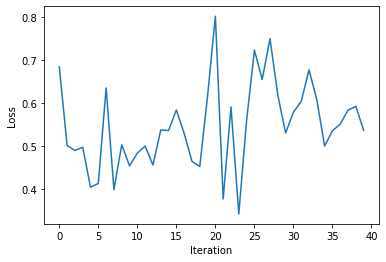

In [81]:
print (iteration_loss)
plt.plot(iteration_loss)
plt.ylabel('Loss')
plt.xlabel('Iteration')
plt.show()

In [83]:
torch.save(model.state_dict(), '/content/drive/MyDrive/google colab/Assignment-2/model_base_1.pkl')